#### 1 : Import Necessary Libraries

In [319]:
import pandas as pd
import os
import matplotlib.pyplot as plt
from itertools import combinations
from collections import Counter

#### 2 : Marge the 12 months of sales data into a single CSV file (RUN ONE TIME ONLY)

In [320]:
# # Get all directories of files in list
# files = [file for file in os.listdir('../datasets/Sales_Data')]

# # Define dataFrame to storing all files in one dataFrame 
# all_months_data = pd.DataFrame()

# # store all data in one DataFrame
# for file in files:
#     df = pd.read_csv('../datasets/Sales_Data/'+file)
#     all_months_data = pd.concat([all_months_data,df]) # concat files
    
# # convert dataFrame to CSV file

# all_months_data.to_csv('../datasets/Sales_Data/all_sales_months.csv', index=False)

#### 3 : Read and updated DataFrame 

In [321]:
sales_df = pd.read_csv('../datasets/Sales_Data/data.csv')
sales_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


#### 4 : Clean Up The Data

###### Drop Rows NAN

In [322]:
sales_df = sales_df.dropna(how='all') 
# sales_df.head()

###### Find 'Or' and remove it


In [323]:
sales_df = sales_df[sales_df['Order Date'].str[0:2] != 'Or']

##### Reset index

In [324]:
sales_df = sales_df.reset_index()
sales_df = sales_df.drop(columns = 'index')

###### Convert columns to correct type

In [325]:
sales_df['Quantity Ordered'] = pd.to_numeric(sales_df['Quantity Ordered']) # make int
sales_df['Price Each'] = pd.to_numeric(sales_df['Price Each']) # make Float

#### 5 : Augment data with additional columns

###### A) Add Month Column

In [326]:
sales_df['Month'] = sales_df['Order Date'].str[0:2]
sales_df['Month'] = sales_df['Month'].astype('int32')
# sales_df.head()

###### B) Add Sales Column

In [327]:
sales_df['Sales'] = sales_df['Quantity Ordered'] * sales_df['Price Each']
# sales_df.head()

###### C) Add City Column

In [328]:
# use apply() method
def get_city(address):
    return address.split(',')[1]
def get_State(address):
    return address.split(',')[2].split(' ')[1]
sales_df['City'] = sales_df['Purchase Address'].apply(lambda x:f"{get_city(x)} ({get_State(x)})")
sales_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
1,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
2,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
3,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
4,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


### Question 1: What was the best month for sales? How much was earned that month? 

In [329]:
sales_months = sales_df.groupby('Month').sum()

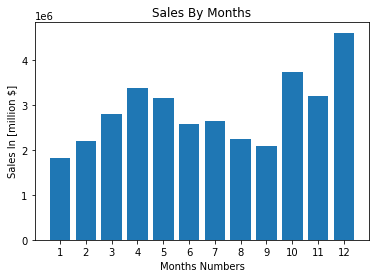

In [330]:
months = sales_months.index
plt.title('Sales By Months')
plt.bar(months,sales_months['Sales'])
plt.xticks(months)
plt.ylabel('Sales In [million $]')
plt.xlabel('Months Numbers')
plt.show()

### Question 2: What city had the highest number of sales?

In [331]:
highest_city_sales = sales_df.groupby('City').sum()

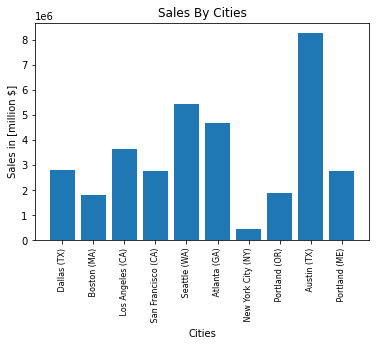

In [332]:
cities = sales_df['City'].unique()
plt.title('Sales By Cities')
plt.bar(cities,highest_city_sales['Sales'])
plt.xticks(cities, rotation='vertical',size=8)
plt.ylabel('Sales in [million $]')
plt.xlabel('Cities')
plt.show()

### Question 3: What time should we display advertisements to maximize likelihood of costomer's buying pooduct?

In [333]:
sales_df['Order Date'] = pd.to_datetime(sales_df['Order Date']) # convert date column to real date format

In [334]:
sales_df['Hour'] = sales_df['Order Date'].dt.hour # Add Hour column 
sales_df['Minute'] = sales_df['Order Date'].dt.minute # Add Minute column

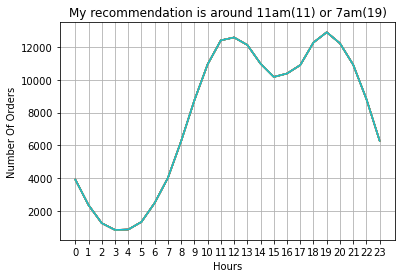

In [335]:
hours = [hour for hour, df in sales_df.groupby('Hour')]

plt.plot(hours,sales_df.groupby('Hour').count())
plt.title("My recommendation is around 11am(11) or 7am(19)")
plt.xticks(hours)
plt.xlabel('Hours')
plt.ylabel('Number Of Orders')
plt.grid()
plt.show()

# My recommendation is around 11am(11) or 7am(19)

My recommendation is around 11am(11) or 7am(19)

### Question 4: What products are most often sold togather? 

In [336]:
most_sold_togather_df = sales_df[sales_df['Order ID'].duplicated(keep=False)]
group_products = most_sold_togather_df.groupby('Order ID')['Product'].transform(lambda x:','.join(x))
most_sold_togather_df.insert(2,'Grouped',group_products,True)
# most_sold_togather_df['Grouped'] = colm
most_sold_togather_df = most_sold_togather_df[['Order ID','Grouped']].drop_duplicates()
most_sold_togather_df

,Order ID,Grouped
2,176560,"Google Phone,Wired Headphones"
17,176574,"Google Phone,USB-C Charging Cable"
29,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
31,176586,"AAA Batteries (4-pack),Google Phone"
118,176672,"Lightning Charging Cable,USB-C Charging Cable"
...,...,...
185882,259296,"Apple Airpods Headphones,Apple Airpods Headphones"
185884,259297,"iPhone,Lightning Charging Cable,Lightning Char..."
185892,259303,"34in Ultrawide Monitor,AA Batteries (4-pack)"
185904,259314,"Wired Headphones,AAA Batteries (4-pack)"


In [337]:
count = Counter()
number_of_group = 4
for row in most_sold_togather_df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list,number_of_group)))
print(number_of_group,' Products Group')
for k,v in count.most_common(10):
    groups = ''
    for i in k:
        groups += i+" | "
    print('-----------------------------',v,'-----------------------------') 
    print(groups[:-2])     

4  Products Group
----------------------------- 4 -----------------------------
iPhone | Lightning Charging Cable | Apple Airpods Headphones | Wired Headphones 
----------------------------- 3 -----------------------------
Google Phone | USB-C Charging Cable | Bose SoundSport Headphones | Wired Headphones 
----------------------------- 2 -----------------------------
Vareebadd Phone | USB-C Charging Cable | Bose SoundSport Headphones | Wired Headphones 
----------------------------- 1 -----------------------------
Google Phone | USB-C Charging Cable | Wired Headphones | USB-C Charging Cable 
----------------------------- 1 -----------------------------
iPhone | Lightning Charging Cable | Wired Headphones | AA Batteries (4-pack) 
----------------------------- 1 -----------------------------
Google Phone | USB-C Charging Cable | Bose SoundSport Headphones | 34in Ultrawide Monitor 
----------------------------- 1 -----------------------------
Google Phone | USB-C Charging Cable | Wired He

### Question 5: What Product sold the most? Why do you think it sold the most? 

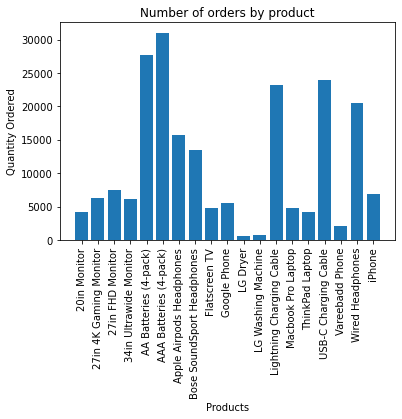

In [338]:
most_product = sales_df.groupby('Product')

quantity_orders = most_product['Quantity Ordered'].sum()

products = [product for product,df in most_product]
plt.title('Number of orders by product')
plt.bar(products,quantity_orders)
plt.xticks(products, rotation='vertical', size=10)
plt.xlabel('Products')
plt.ylabel('Quantity Ordered')
plt.show()